# Regressão Linear Múltipla

**Problema:** Uma empresa deseja entender os fatores que influenciam os salários de seus colaboradores. Especificamente, a empresa quer saber como a educação superior, o tempo na empresa, a experiência em outras empresas e o conhecimento de inglês afetam os salários. Essa análise ajudará a empresa a tomar decisões mais informadas sobre remuneração e desenvolvimento de carreira.

**Objetivo:** O objetivo deste projeto é desenvolver um modelo de regressão linear múltipla que permita à empresa identificar e quantificar a influência desses fatores no salário dos colaboradores. A partir disso, espera-se melhorar a estrutura salarial e promover estratégias de desenvolvimento profissional mais eficazes.

## Importação das Bibliotecas

In [1]:
# Pacotes de manipulação de dados
import numpy as np
import pandas as pd

# Pacotes gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Pacotes de modelagem
import statsmodels.api as sm
from scipy.stats import pearsonr

## Importação e tratamento da base de dados

In [2]:
# Carregar os dados do arquivo Excel
df = pd.read_excel('base_salarios.xlsx')

# Exibir o número de linhas e colunas
print('Número de linhas e colunas:')
print(df.shape)

print('\n-------------------------------------')

# Exibir as primeiras linhas dos dados
print('\nVisualização inicial dos dados:')
print(df.head())

Número de linhas e colunas:
(46, 6)

-------------------------------------

Visualização inicial dos dados:
   Núm. Funcionário  Salario  Anos de Educação Superior  Tempo na Empresa  \
0                29   4139.5                          0                 0   
1                19   4331.1                          0                 6   
2                38   4629.1                          2                 1   
3                26   4645.9                          0                 5   
4                17   4651.2                          2                 0   

   Tempo de Experiencia em outras empresas Inglês  
0                                       11    Não  
1                                        1    Não  
2                                        6    Não  
3                                        4    Não  
4                                        6    Não  


In [3]:
# Drop das colunas desnecessárias
columns_to_drop = ['Núm. Funcionário']
columns_to_drop = [col for col in columns_to_drop if col in df.columns]
df.drop(columns=columns_to_drop, inplace=True)


# Renomear as colunas conforme especificado
df.rename(columns={
    'Salario': 'Salario',
    'Anos de Educação Superior': 'Anos_Educ_Superior',
    'Tempo na Empresa': 'Tempo_Empresa',
    'Tempo de Experiencia em outras empresas': 'Tempo_Outras_Empresas',
    'Inglês': 'Ingles'
}, inplace=True)

In [4]:
# Amostra de dados da base
df.sample(5, random_state=42)

,Salario,Anos_Educ_Superior,Tempo_Empresa,Tempo_Outras_Empresas,Ingles
39,9316.0,6,25,3,Sim
25,6570.9,4,19,1,Não
26,6788.4,5,21,1,Não
44,11974.4,12,25,4,Sim
35,8086.9,6,14,3,Sim


## Análise Exploratória

### Salários

In [5]:
# Estatísticas dos Salários
df['Salario'].describe()

count       46.000000
mean      6969.797826
std       1924.868873
min       4139.500000
25%       5818.350000
50%       6394.750000
75%       7972.400000
max      12118.100000
Name: Salario, dtype: float64

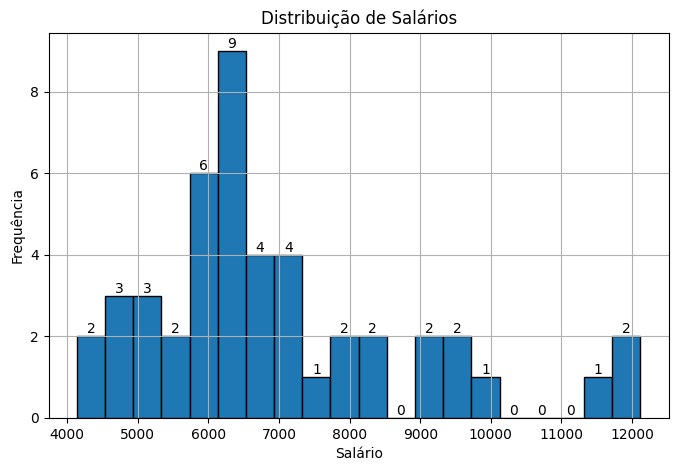

In [6]:
# Histograma da coluna 'Salario'
plt.figure(figsize=(8, 5))
n, bins, patches = plt.hist(df['Salario'], bins=20, edgecolor='black')
plt.title('Distribuição de Salários')
plt.xlabel('Salário')
plt.ylabel('Frequência')
plt.grid(True)

# Adicionar rótulos de dados
for i in range(len(patches)):
    plt.text(patches[i].get_x() + patches[i].get_width() / 2, patches[i].get_height(),
             int(patches[i].get_height()), ha='center', va='bottom')

plt.show()

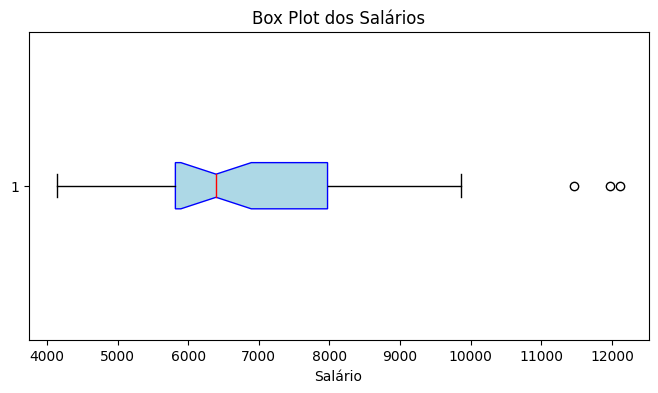

In [7]:
# Criar o box plot da coluna 'Salario'
plt.figure(figsize=(8, 4))
plt.boxplot(df['Salario'], vert=False, patch_artist=True, notch=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            medianprops=dict(color='red'))

# Adicionar título e rótulo ao eixo x
plt.title('Box Plot dos Salários')
plt.xlabel('Salário')

# Exibir o gráfico
plt.show()

### Anos de Educação Superior

In [8]:
# Estatísticas dos Anos de Educação Superior 
df['Anos_Educ_Superior'].describe()

count    46.000000
mean      5.065217
std       2.839422
min       0.000000
25%       4.000000
50%       5.000000
75%       6.000000
max      12.000000
Name: Anos_Educ_Superior, dtype: float64

### Tempo de Empresa

In [9]:
# Estatísticas do tempo de empresa
df['Tempo_Empresa'].describe()

count    46.000000
mean     10.326087
std       7.601328
min       0.000000
25%       5.250000
50%       8.500000
75%      17.250000
max      27.000000
Name: Tempo_Empresa, dtype: float64

### Tempo em Outras Empresas

In [10]:
# Estatísticas do tempo em outras empresas
df['Tempo_Outras_Empresas'].describe()

count    46.000000
mean      4.608696
std       3.726650
min       0.000000
25%       2.250000
50%       4.000000
75%       6.000000
max      19.000000
Name: Tempo_Outras_Empresas, dtype: float64

### Inglês

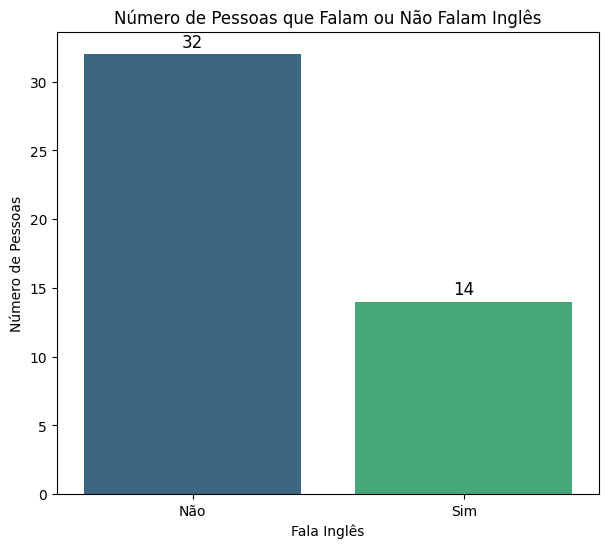

In [11]:
# Cria a contagem de valores na coluna 'Ingles'
ingles_counts = df['Ingles'].value_counts().reset_index()
ingles_counts.columns = ['Ingles', 'Count']

# Cria o gráfico de barras
plt.figure(figsize=(7, 6))
ax = sns.barplot(data=ingles_counts, x='Ingles', y='Count', palette='viridis', hue='Ingles', dodge=False, legend=False)

# Adiciona os rótulos de dados
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), 
                textcoords='offset points')

# Configurações do gráfico
plt.xlabel('Fala Inglês')
plt.ylabel('Número de Pessoas')
plt.title('Número de Pessoas que Falam ou Não Falam Inglês')
plt.show()

## Análise Bidimensional

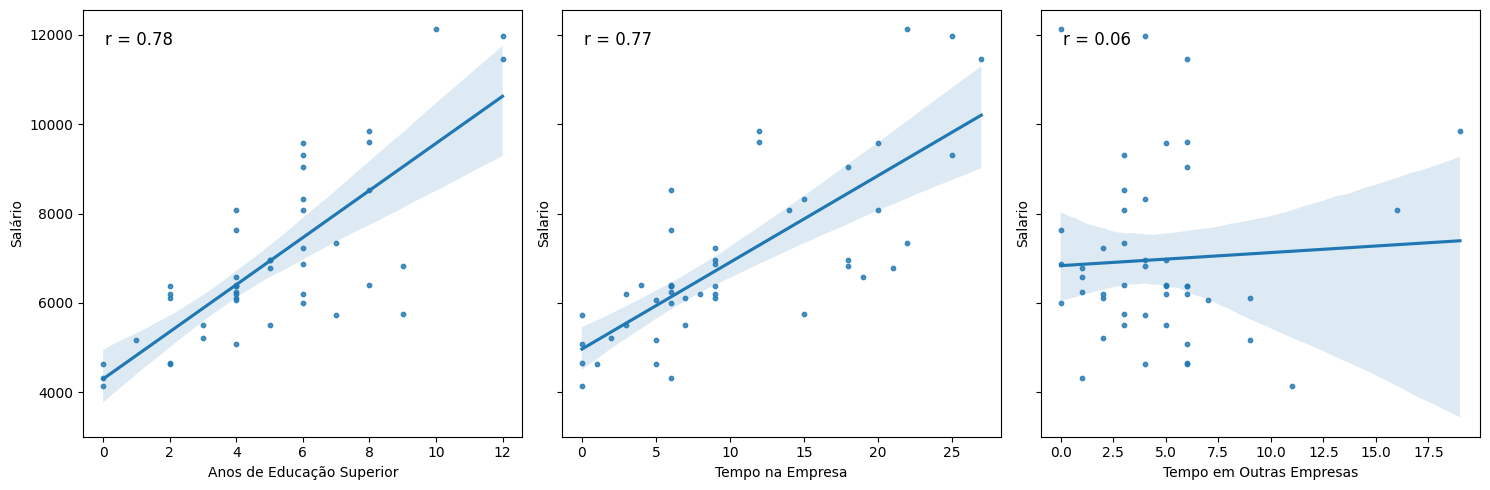

In [12]:
# Função para adicionar o valor de r no gráfico
def add_r_value(ax, x, y):
    r, _ = pearsonr(x, y)
    ax.text(0.05, 0.95, f'r = {r:.2f}', transform=ax.transAxes, fontsize=12, verticalalignment='top')

# Configuração dos subplots
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, sharey=True, figsize=(15, 5))

# Gráfico de dispersão com linha de tendência para Anos_Educ_Superior vs Salario
sns.regplot(ax=ax1, x='Anos_Educ_Superior', y='Salario', data=df, scatter_kws={'s': 10})
ax1.set_xlabel('Anos de Educação Superior')
ax1.set_ylabel('Salário')
add_r_value(ax1, df['Anos_Educ_Superior'], df['Salario'])

# Gráfico de dispersão com linha de tendência para Tempo_Empresa vs Salario
sns.regplot(ax=ax2, x='Tempo_Empresa', y='Salario', data=df, scatter_kws={'s': 10})
ax2.set_xlabel('Tempo na Empresa')
add_r_value(ax2, df['Tempo_Empresa'], df['Salario'])

# Gráfico de dispersão com linha de tendência para Tempo_Outras_Empresas vs Salario
sns.regplot(ax=ax3, x='Tempo_Outras_Empresas', y='Salario', data=df, scatter_kws={'s': 10})
ax3.set_xlabel('Tempo em Outras Empresas')
add_r_value(ax3, df['Tempo_Outras_Empresas'], df['Salario'])

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.show()

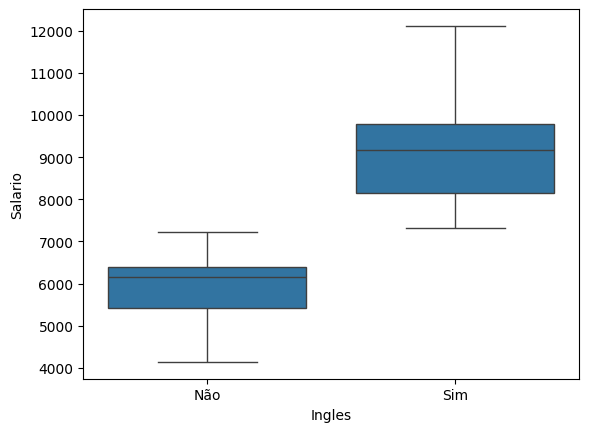

In [13]:
# Box Plot dos salários x inglês
sns.boxplot(x=df['Ingles'], y=df['Salario']);

Como a distribuição entre quem tem e não tem skill de dados é tão diferente, é praticamente certo que essa variável contribuirá para que o modelo explique ainda mais a variabilidade da variável salário, ou seja, aumente o R². **Na prática**: as estimativas realizadas pelo modelo serão ainda melhores.

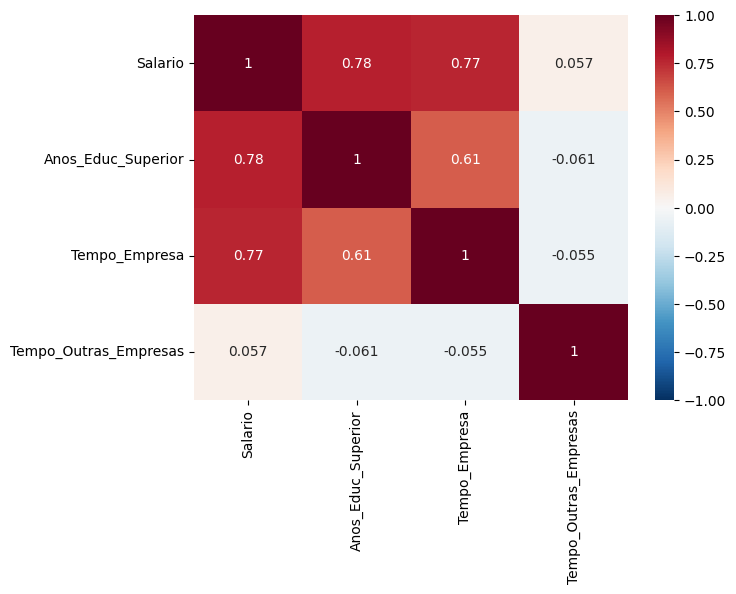

In [14]:
# Seleciona apenas as colunas numéricas do DataFrame
df_numerico = df.select_dtypes(include=[float, int])

# Calcula a matriz de correlação
corr = df_numerico.corr()

# Cria o heatmap
fig = plt.figure(figsize=(7, 5))
sns.heatmap(corr, cmap='RdBu_r', vmin=-1, vmax=1, annot=True)
plt.show()

## Preparação dos Dados

### Criando variáveis Dummy

In [15]:
df.sample(5, random_state=42)

,Salario,Anos_Educ_Superior,Tempo_Empresa,Tempo_Outras_Empresas,Ingles
39,9316.0,6,25,3,Sim
25,6570.9,4,19,1,Não
26,6788.4,5,21,1,Não
44,11974.4,12,25,4,Sim
35,8086.9,6,14,3,Sim


In [16]:
# Criação da variável dummy usando o get_dummies()
df2 = pd.get_dummies(df, drop_first=True)

# Converter True/False para 1/0
df2 = df2.astype(int)

df2.sample(5, random_state=42)
# df.head()

,Salario,Anos_Educ_Superior,Tempo_Empresa,Tempo_Outras_Empresas,Ingles_Sim
39,9316,6,25,3,1
25,6570,4,19,1,0
26,6788,5,21,1,0
44,11974,12,25,4,1
35,8086,6,14,3,1


### Ajuste do Modelo de Regressão usando o Statsmodels (Pacote de Modelos Estatísticos)

In [17]:
# Visualização das 5 primeiras linhas do df2
df2.head()

,Salario,Anos_Educ_Superior,Tempo_Empresa,Tempo_Outras_Empresas,Ingles_Sim
0,4139,0,0,11,0
1,4331,0,6,1,0
2,4629,2,1,6,0
3,4645,0,5,4,0
4,4651,2,0,6,0


In [18]:
# Variável resposta
y = df2['Salario']

# Variáveis explicativas
df2['intercepto'] = 1 

x = df2[['intercepto',
         'Anos_Educ_Superior',
         'Tempo_Empresa',
         'Tempo_Outras_Empresas',
         'Ingles_Sim']]

In [19]:
# Ajusta o modelo e retorna os resultados
modelo = sm.OLS(y , x)
resultado = modelo.fit()
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:                Salario   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     67.72
Date:                Mon, 15 Jul 2024   Prob (F-statistic):           1.62e-17
Time:                        15:43:12   Log-Likelihood:                -365.98
No. Observations:                  46   AIC:                             742.0
Df Residuals:                      41   BIC:                             751.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
intercepto             4422.45


Quando uma variável tem um p-valor superior a 5%, significa que ela não é estatisticamente significativa. No nosso caso, Tempo_Outras_Empresas apresentou um p-valor acima desse limite, indicando que não há evidências suficientes para afirmar que ela afeta o salário de forma consistente. Por isso, foi excluída do modelo para focarmos nas variáveis que realmente influenciam o salário.

### Ajuste do Modelo e retorno do resultado sem a variável Tempo_Outras_Empresas

In [20]:
# Variável resposta
y = df2['Salario']

# Variáveis explicativas
df2['intercepto'] = 1 

x = df2[['intercepto',
         'Anos_Educ_Superior',
         'Tempo_Empresa',
         'Ingles_Sim']]

In [21]:
# Ajusta o modelo e retorna os resultados
modelo = sm.OLS(y , x)
resultado = modelo.fit()
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:                Salario   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     92.40
Date:                Mon, 15 Jul 2024   Prob (F-statistic):           1.57e-18
Time:                        15:43:12   Log-Likelihood:                -366.00
No. Observations:                  46   AIC:                             740.0
Df Residuals:                      42   BIC:                             747.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
intercepto          4456.2760    231

## Equação do modelo

Salário = $\beta_0$ + $\beta_1$ x Anos de Educação Superior + $\beta_2$ x Tempo de Empresa + $\beta_3$ x Sabe Inglês

## Interpretação do Modelo

**Intercepto ou $\beta_0$**: Salário médio de um colaborador sem educação superior, recém chegado na empresa e sem saber falar inglês é de `R$4.456,28`.<br>
**$\beta_1$** x Anos de Educação Superior: Cada ano adicional de educação superior, mantendo tempo de empresa e sabendo falar  inglês, gera um aumento médio de `R$253,59`.<br>
**$\beta_2$** x Tempo de Empresa: Cada ano adicional de tempo de empresa, mantendo os anos de educação superior e sabendo falar  inglês, gera um aumento médio de `R$61,02`.<br>
**$\beta_3$** x Sabe Inglês: Saber falar inglês, mantendo os anos de educação superior e tempo de empresa constantes, gera um aumento médio de `R$1.966,49`.

## Diagnóstico do Modelo: Análise dos Resíduos

In [22]:
def grafico_residuos(resultado):
    resid_graf = sns.scatterplot(x=list(range(0,len(resultado.resid_pearson))),
                                 y=resultado.resid_pearson.tolist())
    
    # Localizando valor mínimo dos resíduos
    r_aux = resultado.resid_pearson.tolist()
    r_aux.append(-3)
    ymin = min(r_aux) * 1.1
    
    # Localizando valor máximo dos resíduos
    r_aux = resultado.resid_pearson.tolist()
    r_aux.append(+3)
    ymax = max(r_aux) * 1.1
    
    resid_graf.set(ylim=(ymin, ymax))
    
    ax1 = resid_graf.axes
    ax1.axhline( 0, color='black', ls='--')
    ax1.axhline(-2, color='black', ls='--')
    ax1.axhline(+2, color='black', ls='--')
    plt.show()

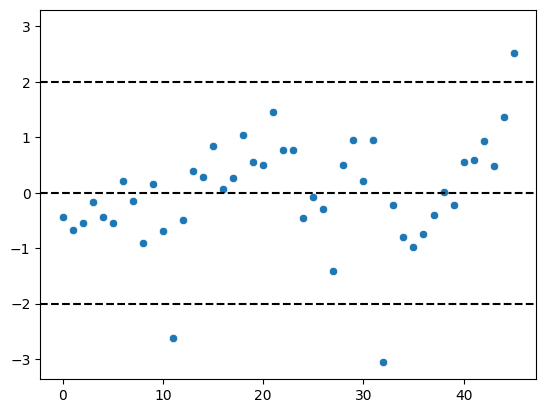

In [23]:
grafico_residuos(resultado)

### Normalidade dos Resíduos

<Axes: ylabel='Count'>

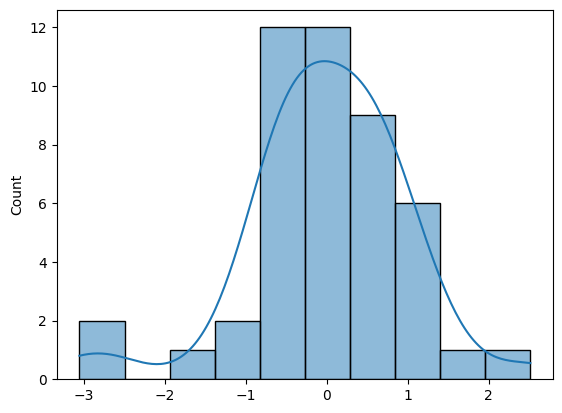

In [34]:
# Construção de histograma para avaliar a distribuição dos resíduos
sns.histplot(resultado.resid_pearson, kde=True)

In [35]:
# Realização de Teste de Hipóteses para avaliar Normalidade
from scipy.stats import shapiro
normalidade = shapiro(resultado.resid_pearson)
print('Estatística=%.3f, p-valor=%.3f\n' % (normalidade.statistic, normalidade.pvalue))

Estatística=0.945, p-valor=0.030



#### Interpretação dos Resultados

***Estatística do Teste (Estatística=0.945):***

- A estatística do teste Shapiro-Wilk varia entre 0 e 1, onde valores próximos de 1 indicam que a distribuição dos dados está mais próxima de uma distribuição normal.
- A estatística de 0.945 sugere que os resíduos de Pearson estão razoavelmente próximos de uma *distribuição normal*, mas não é conclusivo sem considerar o valor p.

***Valor p (p-valor=0.030):***

- O valor p é usado para determinar a significância estatística do teste. Normalmente, um nível de significância (α) de 0.05 é usado como o limiar para decidir se rejeitamos ou não a hipótese nula.
- Se o valor p é menor que 0.05, rejeitamos a hipótese nula, que afirma que os dados seguem uma distribuição normal.
O valor p é ***0.030*** é menor que 0.05. Portanto, deve-se rejeitar a hipótese nula.

***Conclusão Com base no resultado do teste de Shapiro-Wilk:***

- Hipótese Nula (H0): Os resíduos seguem uma distribuição normal.
- Hipótese Alternativa (H1): Os resíduos não seguem uma distribuição normal.

Como o valor p (0.030) é menor que 0.05, rejeita-se a hipótese nula. **Isso indica que há evidências suficientes para concluir que os resíduos de Pearson do modelo não seguem uma distribuição normal.**

### Homocedasticidade dos Resíduos

In [36]:
from statsmodels.stats.diagnostic import het_white
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']

In [37]:
white_test = het_white(resultado.resid_pearson,
                       resultado.model.exog)

In [38]:
print(dict(zip(labels, white_test)))

{'LM Statistic': 10.98510022754315, 'LM-Test p-value': 0.20254487068968194, 'F-Statistic': 1.4509848345289782, 'F-Test p-value': 0.20864807181530812}


### Interpretação dos Resultados

**O que é o Teste de Homocedasticidade?**

- **Homocedasticidade:** Significa que os resíduos do modelo têm uma variância constante. Isso é bom porque indica que o modelo está funcionando bem para todos os níveis de previsão.
- **Heterocedasticidade:** Significa que a variância dos resíduos muda para diferentes níveis de previsão. Isso pode ser um problema porque sugere que o modelo pode não estar capturando toda a variabilidade dos dados de forma adequada.

**Contextualização**

- **Valor p:** É uma medida estatística que nos ajuda a decidir se rejeitamos ou não uma hipótese.
- **Nível de Significância:** Usamos 0.05 como um ponto de corte comum. Se o valor p for menor que 0.05, rejeitamos a hipótese nula (ou seja, concluímos que há heterocedasticidade). Se for maior que 0.05, não rejeitamos a hipótese nula (ou seja, concluímos que não há evidências de heterocedasticidade).

**LM-Test p-value (Valor p do teste de Lagrange Multiplier):**

- Este valor p é usado para testar a hipótese nula de homocedasticidade (ou seja, que os resíduos têm variância constante).
- No caso do estudo, o valor p é 0.2025. Se for maior que 0.05 (ou qualquer outro nível de significância escolhido), não rejeitamos a hipótese nula.

**F-Test p-value (Valor p do teste F):**

- Este valor p também é usado para testar a hipótese nula de homocedasticidade.
- No caso do estudo, o valor p é 0.2086. Se for maior que 0.05 (ou qualquer outro nível de significância escolhido), não rejeitamos a hipótese nula.

**Conclusão**
Para ambos os testes (LM e F), os valores p são maiores que 0.05:

- LM-Test p-value: 0.2025
- F-Test p-value: 0.2086

Como ambos os valores p são maiores que o nível de significância típico de 0.05, não rejeitamos a hipótese nula de homocedasticidade. 
Isso significa que não há evidências suficientes para concluir que existe heterocedasticidade nos resíduos do seu modelo.